In [99]:
import matplotlib.pyplot as plt
import glob
from datetime import datetime

import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import get_body_heliographic_stonyhurst

In [41]:
aia_path='data/AIA/aia_lev1_304a_2011_01_27t22_58_56_12z_image_lev1.fits'
euvi_path='data/SECCHI/20110127_164845_n5eua.fts'

map_aia=sunpy.map.Map(aia_path)
map_euvi=sunpy.map.Map(euvi_path)
out_shape = (512, 512)
map_aia = map_aia.resample(out_shape * u.pix)
map_euvi = map_euvi.resample(out_shape * u.pix)

## Basic info

### AIA

<sunpy.map.sources.sdo.AIAMap object at 0x00000189DDEBD160>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-27 22:58:56
Exposure Time:		 2.902162 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [4.80132 4.80132] arcsec / pix
Reference Pixel:	 [256.22012325 252.45497138] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 1.  ,  0.  ,  0.  , ...,  0.5 , -0.5 ,  0.  ],
       [ 0.25, -0.25,  0.5 , ...,  0.25,  0.  , -0.25],
       [-0.5 ,  0.  , -0.5 , ...,  1.  ,  0.25,  0.5 ],
       ...,
       [ 1.  ,  0.25, -1.  , ..., -0.5 ,  0.  , -0.5 ],
       [-0.5 , -0.5 , -1.  , ..., -0.25,  0.25,  0.75],
       [ 0.5 ,  0.25,  0.25, ...,  0.  , -0.25, -1.  ]])
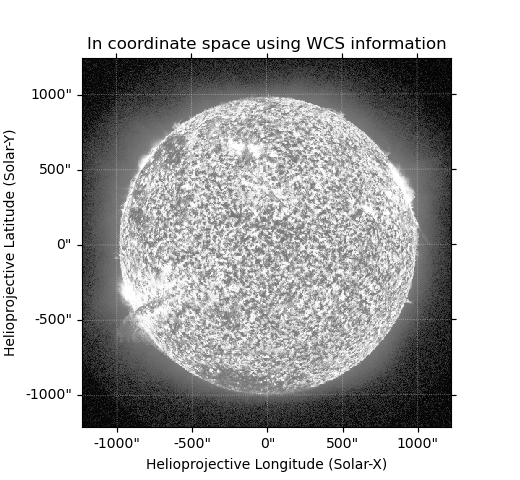
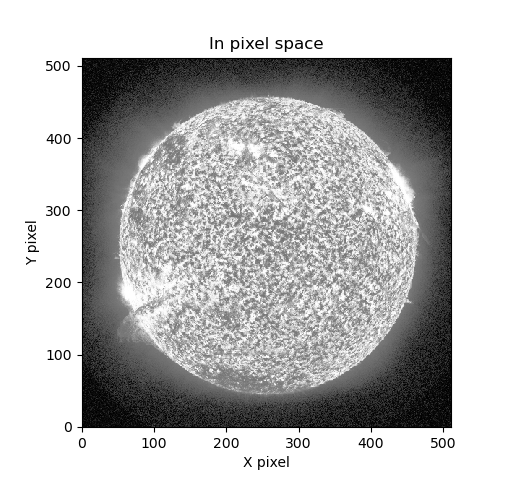
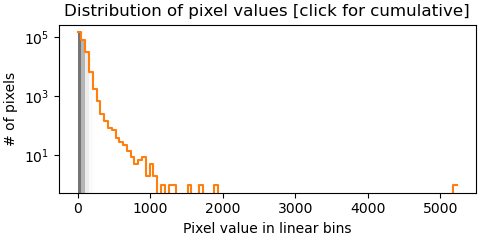
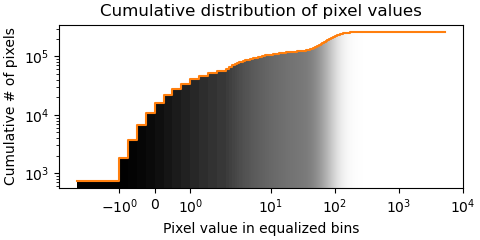

In [44]:
map_aia

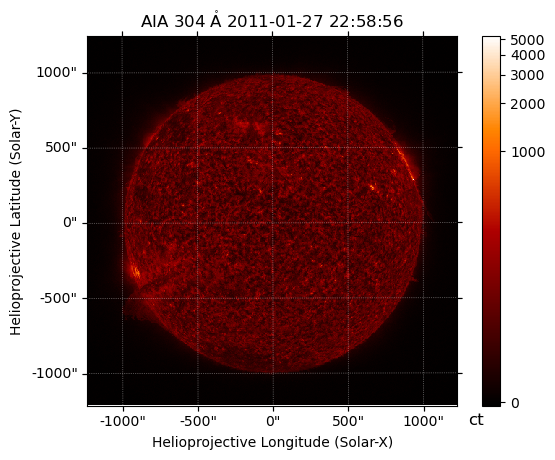

In [45]:
map_aia.peek()

### EUVI

<sunpy.map.sources.stereo.EUVIMap object at 0x00000189DDEBD820>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 EUVI
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-27 16:48:45
Exposure Time:		 4.00205 s
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [6.35109615 6.35109615] arcsec / pix
Reference Pixel:	 [254.8275 230.946 ] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[733. , 732. , 727.5, ..., 722. , 722. , 722. ],
       [729. , 728. , 725. , ..., 722. , 722. , 722. ],
       [729. , 728. , 723. , ..., 722. , 722. , 722. ],
       ...,
       [724. , 724. , 724. , ..., 724. , 724. , 724. ],
       [724. , 724. , 724. , ..., 724. , 724. , 724. ],
       [724. , 724. , 724. , ..., 724. , 724. , 724. ]])
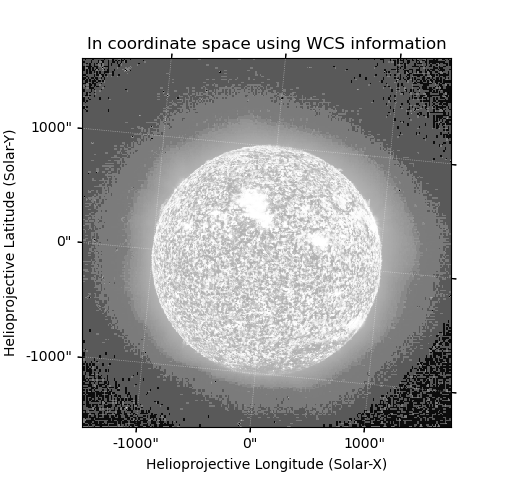
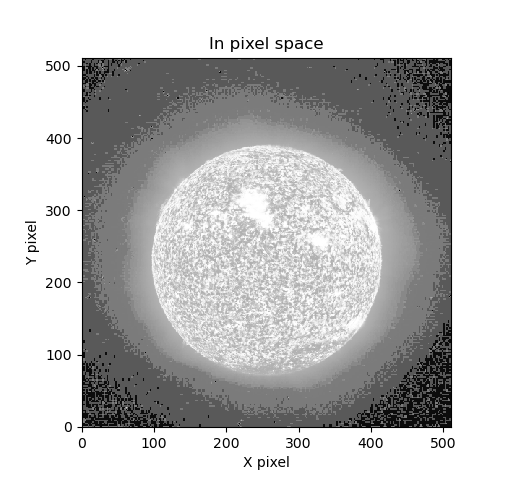
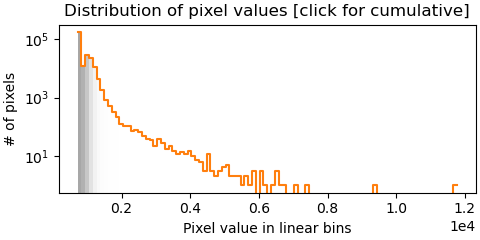
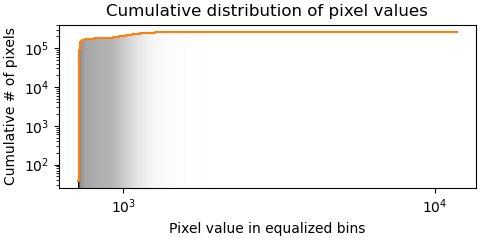

In [43]:
map_euvi

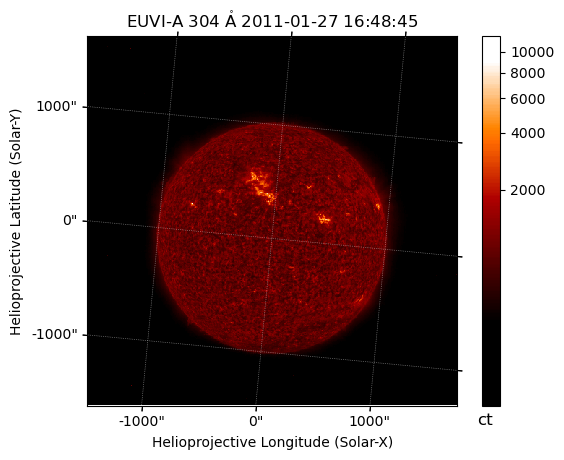

In [46]:
map_euvi.peek()

## EUVI image seen from SDO

Plot the two maps, with the solar limb as seen by each observatory
overlaid on both plots.



INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


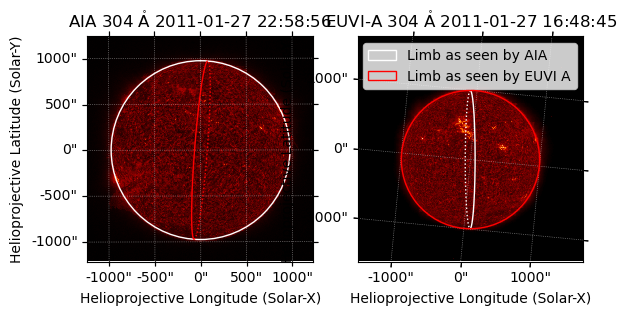

In [38]:
fig = plt.figure()

ax1 = fig.add_subplot(121, projection=map_aia)
map_aia.plot(axes=ax1)
map_aia.draw_limb(axes=ax1, color='white')
map_euvi.draw_limb(axes=ax1, color='red')

ax2 = fig.add_subplot(122, projection=map_euvi)
map_euvi.plot(axes=ax2)
limb_aia = map_aia.draw_limb(axes=ax2, color='white')
limb_euvi = map_euvi.draw_limb(axes=ax2, color='red')

plt.legend([limb_aia[0], limb_euvi[0]],
           ['Limb as seen by AIA', 'Limb as seen by EUVI A'])

We can now plot the STEREO/EUVI image as seen from the position of SDO, next to the AIA image.

In [47]:
out_header = sunpy.map.make_fitswcs_header(
    out_shape,
    map_aia.reference_coordinate.replicate(rsun=map_euvi.reference_coordinate.rsun),
    scale=u.Quantity(map_aia.scale),
    instrument="EUVI",
    observatory="AIA Observer",
    wavelength=map_euvi.wavelength
)

We can now reproject the EUVI map to this output WCS header.
The :meth:`~sunpy.map.GenericMap.reproject_to` defaults to using
the fast :func:`reproject.reproject_interp` algorithm, but a different
algorithm can be specified (e.g., :func:`reproject.reproject_adaptive`).

<sunpy.map.mapbase.GenericMap object at 0x00000189DDBF8520>
SunPy Map
---------
Observatory:		 
Instrument:		 
Detector:		 
Measurement:		 Unknown
Wavelength:		 Unknown
Observation Date:	 2011-01-27 22:58:56
Exposure Time:		 Unknown
Dimension:		 [512. 512.] pix
Coordinate System:	 helioprojective
Scale:			 [0.0013337 0.0013337] deg / pix
Reference Pixel:	 [255.5 255.5] pix
Reference Coord:	 [0. 0.] deg                   
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
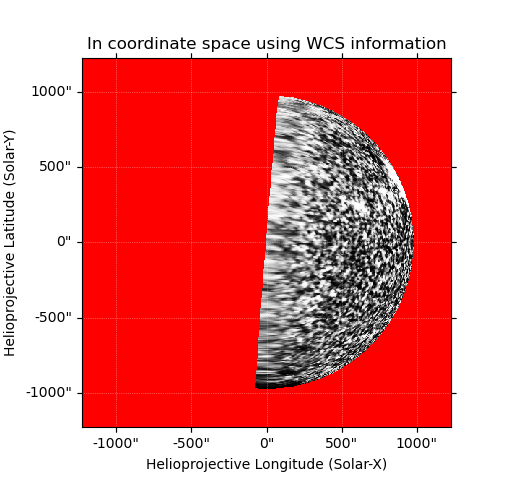
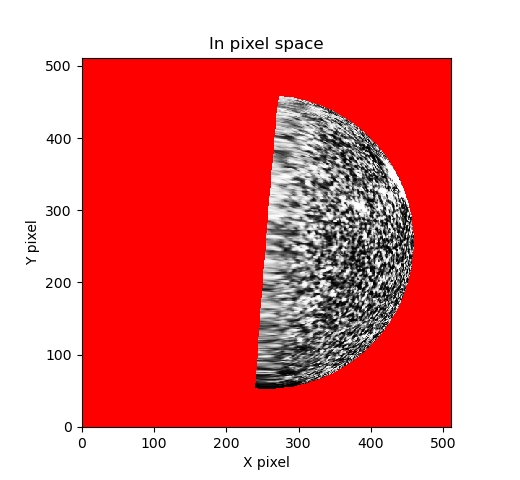
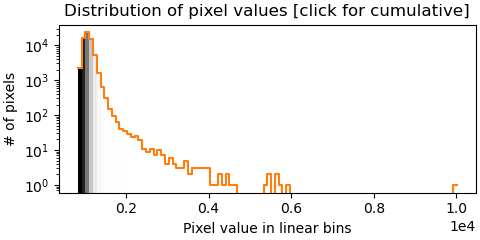
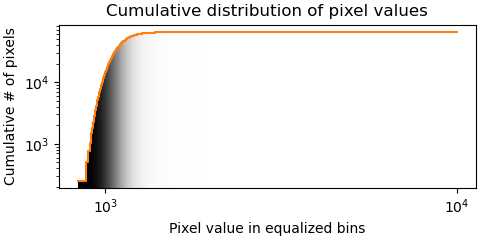

In [50]:
outmap = map_euvi.reproject_to(out_header)
outmap 

In [52]:
outmap.data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [55]:
import numpy as np

# Create an array with NaN values
arr = np.array([1, 2, np.nan, 4, 5, np.nan])

# Compute the sum of the array treating NaN values as zeros
sum_with_nan_as_zero = np.nansum(arr)

print("Sum with NaN as zero:", sum_with_nan_as_zero)


Sum with NaN as zero: 12.0


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


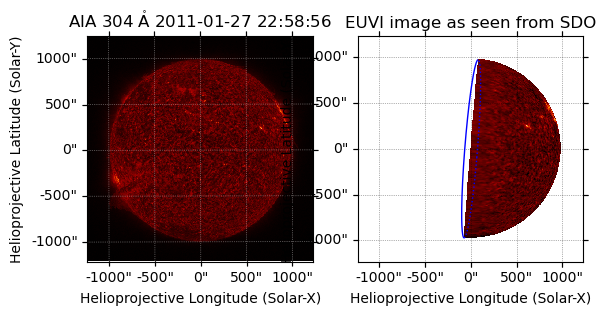

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection=map_aia)
map_aia.plot(axes=ax1)
ax2 = fig.add_subplot(122, projection=outmap)
outmap.plot(axes=ax2, title='EUVI image as seen from SDO')
map_euvi.draw_limb(color='blue')

# Set the HPC grid color to black as the background is white
ax2.coords[0].grid_lines_kwargs['edgecolor'] = 'k'
ax2.coords[1].grid_lines_kwargs['edgecolor'] = 'k'

## read STEREO files

### distinguish A and B

In [87]:
stereo_files = sorted(glob.glob('data/SECCHI/201101*.fts'))

In [88]:
stereo_files[0]

'data/SECCHI\\20110127_160115_n5eua.fts'

In [89]:
maps=sunpy.map.Map(stereo_files)

<sunpy.map.sources.stereo.EUVIMap object at 0x00000189D83DD520>
SunPy Map
---------
Observatory:		 STEREO A
Instrument:		 SECCHI
Detector:		 EUVI
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-27 16:01:15
Exposure Time:		 4.00205 s
Dimension:		 [2048. 2048.] pix
Coordinate System:	 helioprojective
Scale:			 [1.58777404 1.58777404] arcsec / pix
Reference Pixel:	 [1020.81   925.284] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[722, 722, 722, ..., 724, 724, 724],
       [722, 722, 722, ..., 724, 724, 724],
       [722, 722, 722, ..., 724, 724, 724],
       ...,
       [724, 724, 724, ..., 724, 724, 724],
       [724, 724, 724, ..., 724, 724, 724],
       [722, 722, 722, ..., 724, 724, 724]], dtype=uint16)
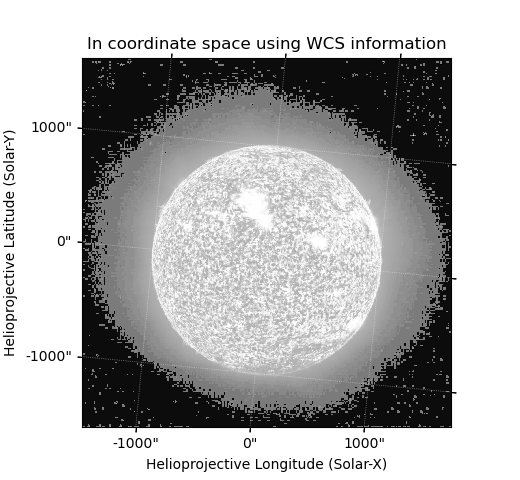
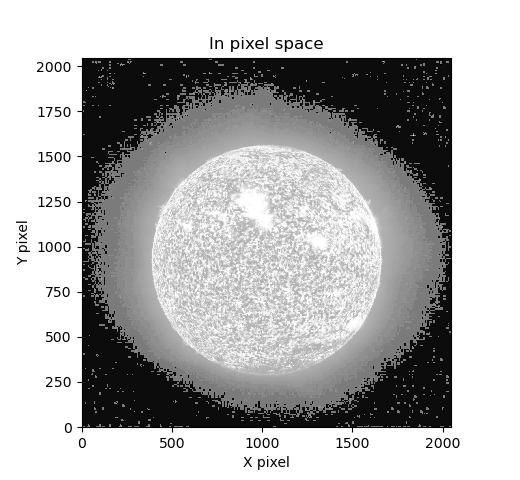
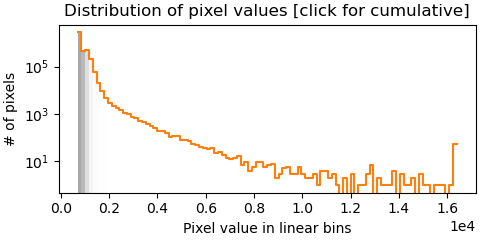
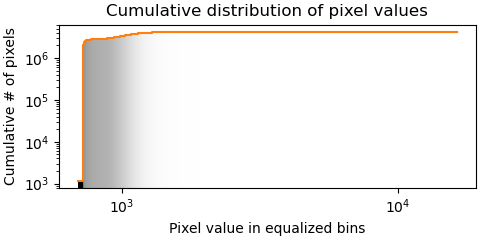

In [90]:
maps[0]

In [13]:
maps[0].meta

MetaDict([('simple', True),
          ('bitpix', 16),
          ('naxis', 2),
          ('naxis1', 2048),
          ('naxis2', 2048),
          ('date-obs', '2011-01-27T16:01:15.008'),
          ('fileorig', 'B12703GL.543'),
          ('seb_prog', 'NORMAL'),
          ('sync', False),
          ('spwx', False),
          ('expcmd', 4.00179),
          ('exptime', 4.00205),
          ('dstart1', 1),
          ('dstop1', 2048),
          ('dstart2', 1),
          ('dstop2', 2048),
          ('p1col', 51),
          ('p2col', 2098),
          ('p1row', 1),
          ('p2row', 2048),
          ('r1col', 129),
          ('r2col', 2176),
          ('r1row', 79),
          ('r2row', 2126),
          ('rectify', True),
          ('rectrota', 6),
          ('ledcolor', 'NONE'),
          ('ledpulse', 0),
          ('offset', 600),
          ('biasmean', 725.176),
          ('biassdev', 0.019),
          ('gaincmd', 1),
          ('gainmode', 'HIGH'),
          ('summed', 1.0),
          ('sumro

In [91]:
maps[0].meta['obsrvtry']

'STEREO_A'

In [92]:
maps[0].meta['date-obs']

'2011-01-27T16:01:15.008'

maps[0]

In [93]:
# distinguish fits files from stereo A and stereo B
stereo_a = [m for m in maps if m.meta['obsrvtry'] == 'STEREO_A']
stereo_b = [m for m in maps if m.meta['obsrvtry'] == 'STEREO_B']

In [94]:
print(len(stereo_a))
for m in stereo_a:
    print(m.meta['date-obs'])

22
2011-01-27T16:01:15.008
2011-01-27T16:03:45.008
2011-01-27T16:06:15.006
2011-01-27T16:11:15.009
2011-01-27T16:13:45.006
2011-01-27T16:16:15.011
2011-01-27T16:18:45.010
2011-01-27T16:21:15.007
2011-01-27T16:23:45.008
2011-01-27T16:26:15.009
2011-01-27T16:28:45.010
2011-01-27T16:31:15.006
2011-01-27T16:33:45.024
2011-01-27T16:36:15.005
2011-01-27T16:38:45.006
2011-01-27T16:41:15.007
2011-01-27T16:43:45.005
2011-01-27T16:46:15.007
2011-01-27T16:48:45.007
2011-01-27T16:51:15.007
2011-01-27T16:53:45.007
2011-01-27T16:56:15.006


In [95]:
print(len(stereo_b))
for m in stereo_b:
    print(m.meta['date-obs'])

6
2011-01-27T16:06:54.019
2011-01-27T16:16:54.017
2011-01-27T16:26:54.015
2011-01-27T16:36:54.012
2011-01-27T16:46:54.010
2011-01-27T16:56:54.007


In [96]:
type(m.meta['date-obs'])

str

In [97]:
m.meta['date-obs']

'2011-01-27T16:56:54.007'

In [100]:
#transform the date-obs string into a datetime object
date_obs = datetime.strptime(m.meta['date-obs'], '%Y-%m-%dT%H:%M:%S.%f')
# I want to get minute from date_obs
date_obs.minute

56

In [158]:
# x-axis: time  y-axis:irradiance
time=[]
irradiance_a=[]
for m in stereo_a:
    time.append( datetime.strptime(m.meta['date-obs'], '%Y-%m-%dT%H:%M:%S.%f')   )
    irradiance_a.append( np.nansum(m.data))
    
time_a=[]
for t in time:
    time_a.append(t.minute)


Text(0.5, 1.0, 'STEREO A')

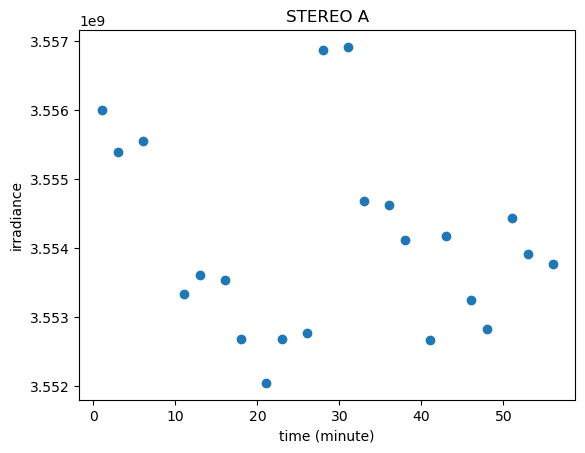

In [159]:
fig,ax=plt.subplots()
ax.scatter(time_a, irradiance_a, label='STEREO A')

ax.set_xlabel("time (minute)")
ax.set_ylabel("irradiance")
ax.set_title('STEREO A')

In [160]:
# x-axis: time  y-axis:irradiance
time=[]
irradiance_b=[]
for m in stereo_b:
    time.append( datetime.strptime(m.meta['date-obs'], '%Y-%m-%dT%H:%M:%S.%f')   )
    irradiance_b.append( np.nansum(m.data))
    
time_b=[]
for t in time:
    time_b.append(t.minute)

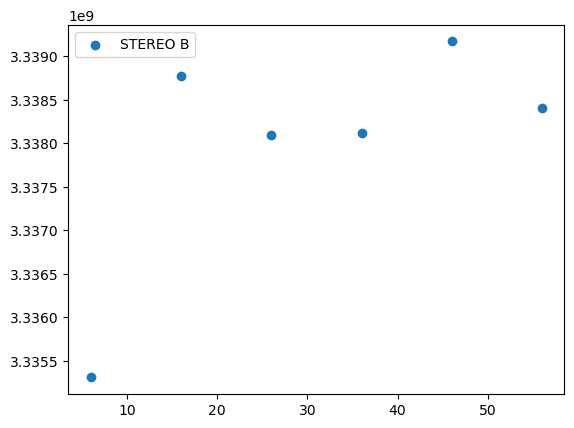

In [161]:
fig,ax=plt.subplots()
ax.scatter(time_b, irradiance_b, label='STEREO B')
ax.legend()

#### combine
此时并没有选择SDO视野部分的，而是STEREO视野作为示意

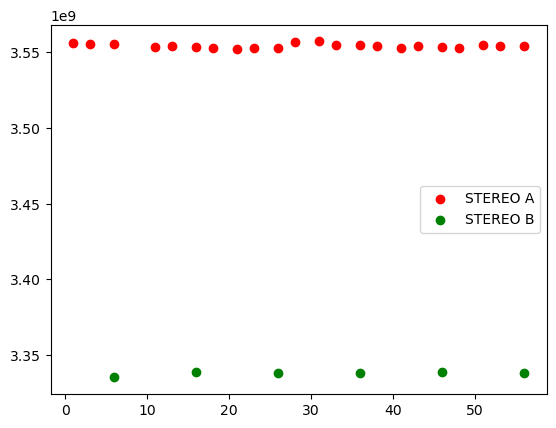

In [162]:
fig,ax=plt.subplots()
ax.scatter(time_a, irradiance_a,c='r' ,label='STEREO A')

ax.scatter(time_b, irradiance_b,c='g' ,label='STEREO B')
ax.legend()

### EUVI image seen from SDO

In [103]:
def reproject(map_aia,map_euvi):
    out_header = sunpy.map.make_fitswcs_header(
    out_shape,
    map_aia.reference_coordinate.replicate(rsun=map_euvi.reference_coordinate.rsun),
    scale=u.Quantity(map_aia.scale),
    instrument="EUVI",
    observatory="AIA Observer",
    wavelength=map_euvi.wavelength)

    outmap = map_euvi.reproject_to(out_header)
    return outmap

In [104]:
outmap=reproject(map_aia,map_euvi)

In [105]:
outmap.data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [106]:
def plot_reproject(map_aia,outmap):
    fig = plt.figure()
    # ax1 = fig.add_subplot(121, projection=map_aia)
    # map_aia.plot(axes=ax1)
    ax2 = fig.add_subplot(122, projection=outmap)
    outmap.plot(axes=ax2, title='EUVI image as seen from SDO')
    map_euvi.draw_limb(color='blue')

    # Set the HPC grid color to black as the background is white
    ax2.coords[0].grid_lines_kwargs['edgecolor'] = 'k'
    ax2.coords[1].grid_lines_kwargs['edgecolor'] = 'k'

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


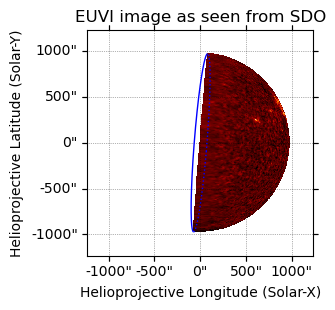

In [107]:
plot_reproject(map_aia,outmap)

### EUVI irradiance ~ time

#### A

In [167]:
irradiance_a=np.zeros(len(stereo_a))
irradiance_a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [168]:
len(stereo_a)

22

In [169]:
for i in range( len(stereo_a)):
    outmap=reproject(map_aia,stereo_a[i])
    irradiance_a[i]=np.nansum(outmap.data)

In [170]:
irradiance_a

array([70713161.12900996, 70718618.16120668, 70738998.86173035,
       70757136.66826436, 70818118.26805781, 70826339.97382173,
       70824976.33888653, 70815652.35141931, 70859064.18715498,
       70941742.83583443, 71016109.02745119, 71020132.49473959,
       71048166.8745445 , 71079184.20471424, 71055165.19153173,
       71061523.58298497, 71108310.530248  , 71138690.97065552,
       71164582.64932555, 71208262.7557945 , 71192171.36819132,
       71217265.75395234])

#### B

In [171]:
irradiance_b=np.zeros(len(stereo_b))
irradiance_b

array([0., 0., 0., 0., 0., 0.])

In [172]:
for i in range( len(stereo_b)):
    outmap=reproject(map_aia,stereo_b[i])
    irradiance_b[i]=np.nansum(outmap.data)

In [173]:
irradiance_b

array([60139797.5514899 , 60295256.11112922, 60470704.71980911,
       60617705.70185682, 60821301.13691059, 60918060.25276361])

#### time

In [174]:
time=[]
irradiance_b=[]
for m in stereo_b:
    time.append( datetime.strptime(m.meta['date-obs'], '%Y-%m-%dT%H:%M:%S.%f')   )
    
time_b=[]
for t in time:
    time_b.append(t.minute)
    
for m in stereo_a:
    time.append( datetime.strptime(m.meta['date-obs'], '%Y-%m-%dT%H:%M:%S.%f')   )
    
time_a=[]
for t in time:
    time_a.append(t.minute)

In [ ]:
fig,ax=plt.subplots()

    
ax.set_xlabel("time (minute)")
ax.set_ylabel("irradiance")
ax.set_title('STEREO')

### sequence visualization

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Miss

C:\Users\asus-pc\AppData\Local\Temp\ipykernel_23684\1343662050.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


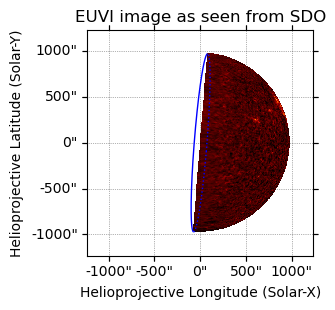

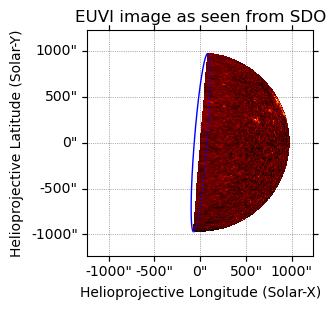

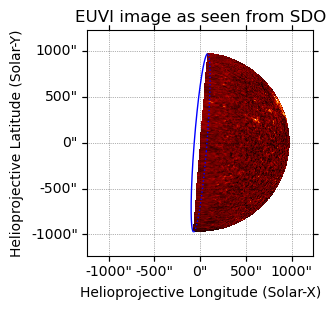

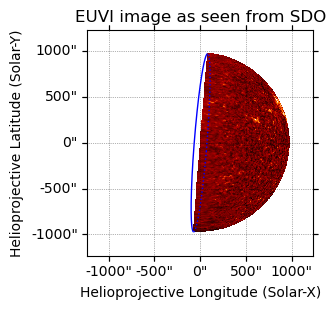

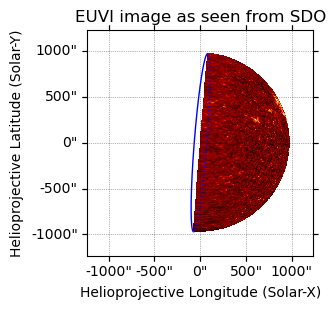

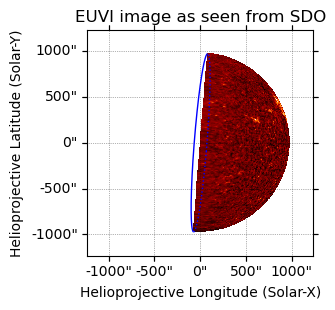

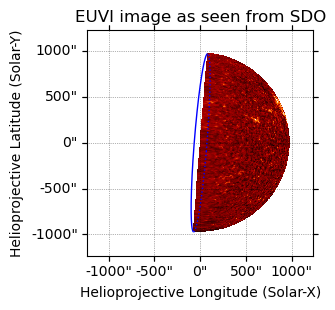

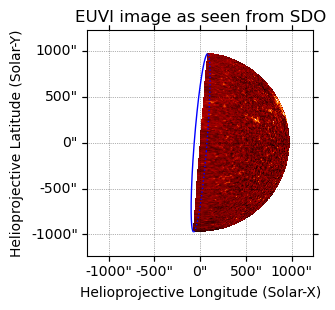

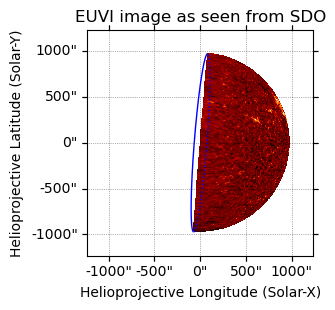

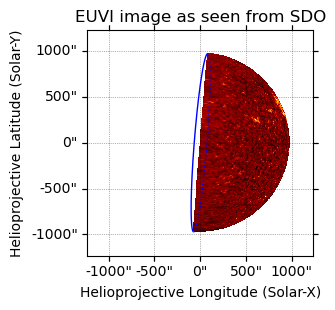

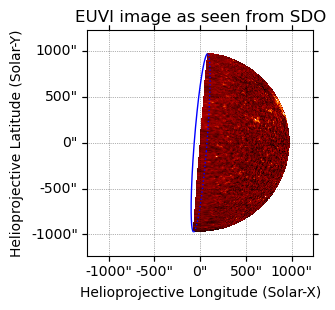

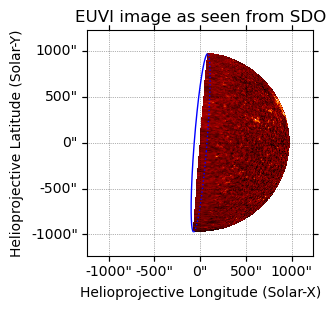

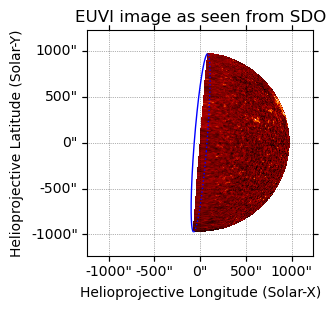

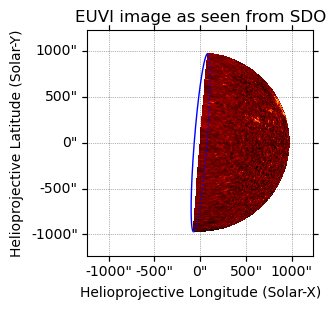

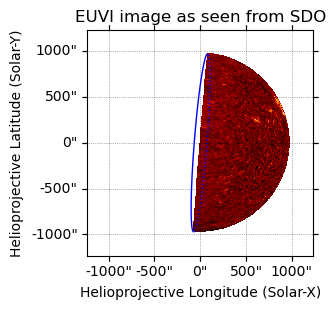

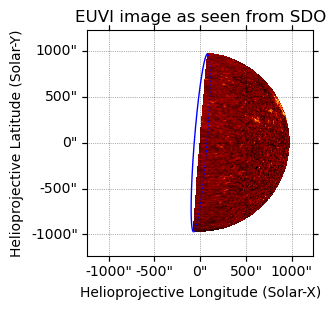

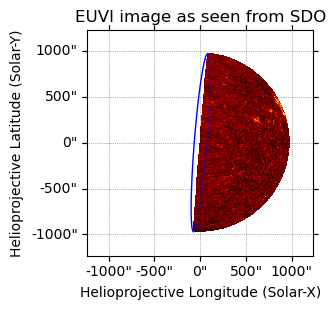

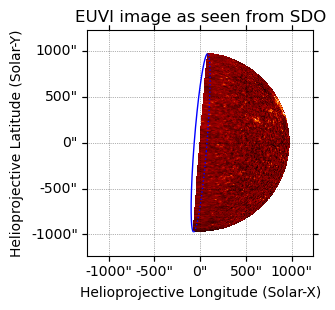

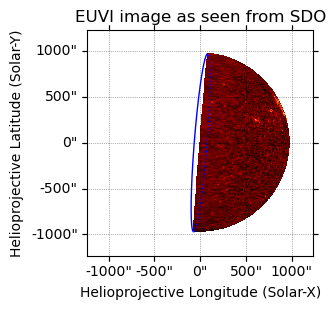

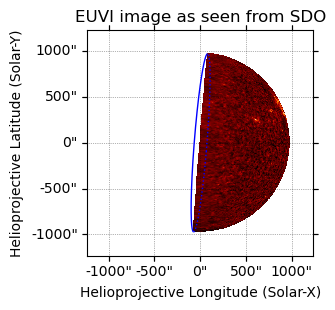

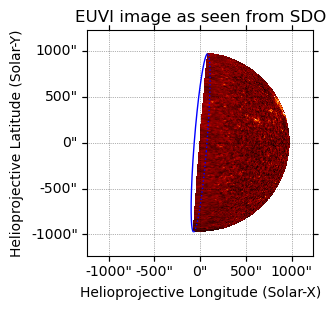

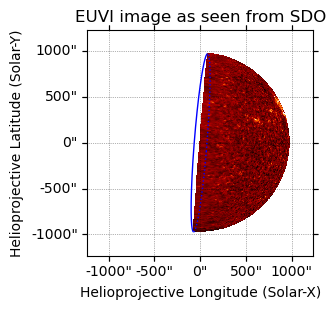

In [134]:
for i in range( len(stereo_a)):
    outmap=reproject(map_aia,stereo_a[i])
    plot_reproject(map_aia,outmap)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


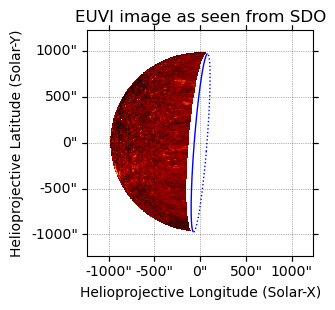

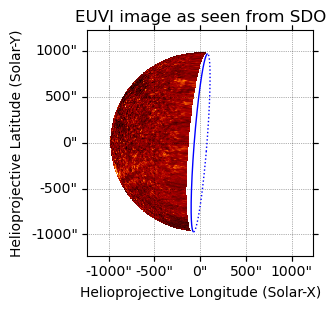

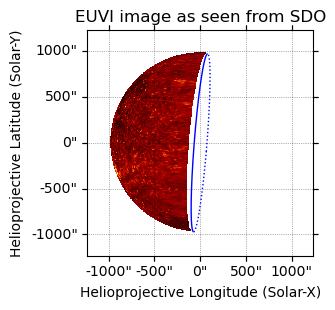

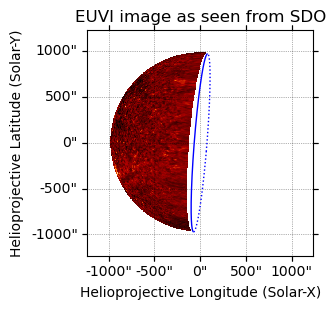

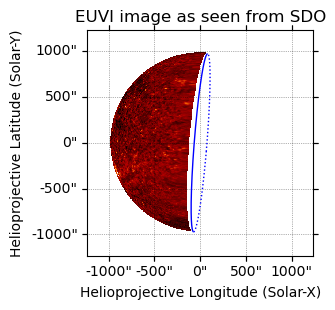

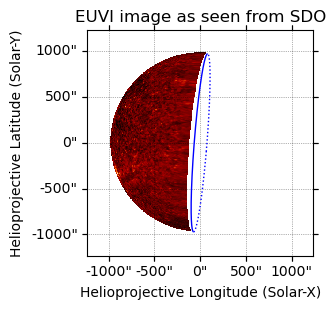

In [135]:
for i in range( len(stereo_b)):
    outmap=reproject(map_aia,stereo_b[i])
    plot_reproject(map_aia,outmap)